# Building circuits with `pytket`

Quantum computers (and simulators) available today can execute quantum programs given in a specific format,
called a "quantum circuit". These circuits can be seen as the equivalent of assembly in classical computer science. Our work, therefore, consists of defining such quantum circuits so that they can be executed on the machine, or simulator, of our choice.

Qubits are the basic unit of quantum computation and the quantum analog of classical bits. A qubit is represented as a combination of two quantum states of a given basis. There are many ways to realize qubits: energy level of electrons, photon polarization, or spin. For example, the most common basis is the $\mathsf{Z}$-basis. For this basis, the quantum states of the hydrogen atom, for example, are expressed as $\left|0\right>$  for the “ground state” and $\left|1\right>$  for the “excited state”, equivalent to 0 or 1 when translated to classical bits. Qubits can be in any quantum state 

$$
\begin{equation*}
\left| \psi \right\rangle=
\alpha\left|0\right> + \beta\left|1\right>,
\end{equation*}
$$

with $\alpha$ and $\beta$ potentially being complex numbers. When we measure the qubit we get state $\left|0\right>$ with probability $|\alpha|^2$ and state $\left|1\right>$ with probability $|\beta|^2$. 

For a single electron in a hydrogen atom, the wavefunction for a basic 50-50 superposition in its electronic ground state and excited state can be written in the form of

$$
\begin{equation*}
\left| \psi \right\rangle = \frac{1}{\sqrt{2}} \left( \left| 0 \right\rangle + \left| 1 \right\rangle\right).
\end{equation*}
$$

When we measure this wavefunction, it will (theoretically) provide a result of 0 or 1 with a given probability. Specifically,  if we measure this qubit at the end of a computation, we get a single, definite value. That is, we get $\left|0\right>$ or $\left|1\right>$, each with some probability, not a superposition of $\left|0\right>$ and $\left|1\right>$. Geometrically, this particular qubit lies on the equator, halfway between the north and south poles of the Bloch sphere, so if we measure it, we get $\left|0\right>$ with probability 1/2 or $\left|1\right>$ with probability 1/2.  

In [1]:
#import warnings #used to disable warnings in this jupyter notebook, can be omitted 
#warnings.filterwarnings('ignore') #used to disable warnings in this jupyter notebook, can be omitted
#pip install qutip   

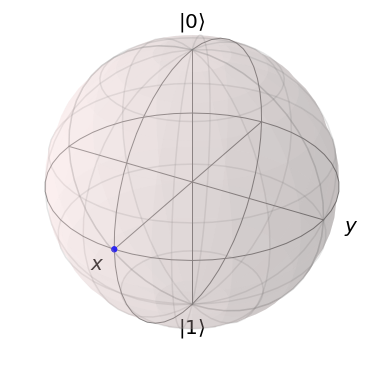

In [2]:
import numpy as np
from pylab import *
from qutip import *

b = qutip.Bloch()
pnt = [1, 0,0]
b.add_points(pnt)

b.show()

A set of distinct measurement outcomes is called a basis, and $\left|0\right>,\left|1\right>$ is called the $\mathsf{Z}$-basis because they lie on the z-axis of the Bloch sphere. This is why we introduced $\left|0\right>$ and $\left|1\right>$ as the north and south poles, respectively, of the Bloch sphere.


To calculate these probabilities, we take the norm-square of the coefficient of $\left|0\right>$ or $\left|1\right>$. That is, the probability of getting $\left|0\right>$ (or $\left|1\right>$) is

$$
\begin{equation*}
\left| \frac{1}{\sqrt{2}} \right|^2 = \frac{1}{2}.
\end{equation*}
$$

One way to create a qubit in such superposition, is to take a qubit initialized in the “ground state” and then apply the Hadamard gate, or H gate, to it: $\left| \psi \right\rangle = H \left| 0 \right\rangle$.

Here the H gate corrresponds to the following matrix

$$
\begin{equation*}
H=\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}\,\, ,
\end{equation*}
$$

and $\left|0\right>$ and $\left|1\right>$ are column vectors, which are vertical lists of numbers

$$
\begin{equation*}
\left|0\right> =
\begin{pmatrix}
1 \\
0
\end{pmatrix}\,\, ,
\left|1\right> =
\begin{pmatrix}
0 \\
1
\end{pmatrix}\,\,.
\end{equation*}
$$

Following the rules of linear algebra, we can show that we obtain $ \left| \psi \right\rangle = \frac{1}{\sqrt{2}} \left( \left| 0 \right\rangle + \left| 1 \right\rangle\right)$  given that we can write 

$$
\begin{equation*}
\left| \psi \right\rangle=
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}\,\, =
\alpha\left|0\right> + \beta\left|1\right>,
\end{equation*}
$$

with $\alpha = \beta = 1/\sqrt{2}$.




## Creating a Circuit

To rewrite this wavefunction in terms of a circuit, i.e. taking a qubit initialized in the “ground state” and then applying the Hadamard gate, we need to first import the [circuit class](https://cqcl.github.io/pytket/manual/manual_circuit.html) from TKET.

In [3]:
from pytket import Circuit

Then to display the circuit we want to evaluate we also need to import

In [4]:
from pytket.circuit.display import render_circuit_jupyter

Then we define our circuit with a single qubit, q[0], and classical bit, c[0], and then apply the The Hadamard gate to it.

In [5]:
circ = Circuit(1,1)
circ.H(0)

[H q[0]; ]

At this step, the qubit q[0] is in a superposition state. We can show a schematic of the corresponding circuit by evaluating

In [6]:
render_circuit_jupyter(circ)

But a real device won't work like this. We cannot observe a full quantum state. We have to make observations and measurments. In fact, we need to sample from a probabilisitic distribution.

## Measurement

In `pytket`, all measurements are single-qubit measurements in the $\mathsf{Z}$-basis. Other forms of measurements can be constructed by combining these with other operations. Measurements produce classical data from the resulting state. Here, c[0] is a calssical register, or classical bit, which we obtain after measuring qubit q[0]. c[0] will either be 0 or 1.

In [7]:
circ.measure_all()
render_circuit_jupyter(circ)

Specifically, if we would prepare q[0] this way 1000 times and measure q[0], roughly 50% of the 1000 measures provided a 0 and 50% provided a 1, as expected.

To implement such measurements, we already installed `pytket-qiskit`. `pytket-qiskit` integrates `qiskit` into `pytket`, an IBM tool that, among other things, provides access to their quantum computers and numerous simulators. For this section, we will use the noiseless AerSimulator. This is a simulator we can run on our computer. We will discuss how to run a circuit on a "real" quantum computer in a different section.

In [8]:
from pytket.extensions.qiskit import AerBackend
backend = AerBackend()

We can check the required conditions to be satisfied for the circuit to be run on this backend. For this, we can use `required_predicates`. This tells us which gates are supported; in case gates are not supported, your circuit can be compiled for a given backend, and re-written in the supported gates, i.e. rotations can be decomposed into a set of Euler angles.

In [9]:
backend.required_predicates

[NoSymbolsPredicate,
 GateSetPredicate:{ S Barrier Sdg RangePredicate Unitary2qBox Z X Y T Tdg SX SXdg H Rx Ry Rz U3 U2 U1 TK1 CX CY CZ CU1 CU3 CCX SWAP CSWAP noop Measure Reset PhasedX XXPhase YYPhase ZZPhase CnX Unitary1qBox }]

Looks all good. the AerBackend supports the `H` gate and has a measurment option.

Next we run the circuits by sampling it. Since we have to sample, we have to indicate how many samples we want to take. Suppose we would like to get 10 shots out from the AerBackend (10 repeats of the circuit and measurement). We can seed the simulator's random-number generator to make the results reproducible, using an optional keyword argument to `process_circuit`.

In [10]:
handle = backend.process_circuit(circ, n_shots=10, seed=1)

Now, we can output a shot table:

In [11]:
shots = backend.get_result(handle).get_shots()
print(shots)

[[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


These are our 10 measurements. The column represents the classical register, c[0], of qubit q[0]. We can also get a summary of the results by looking at counts.

In [12]:
counts = backend.get_result(handle).get_counts()
print(counts)

Counter({(0,): 7, (1,): 3})


Or we can plot a histogram of our results.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_counts(counts):
    counts_record = [{"State":state, "Count":count} for state, count in counts.items()]
    count_df = pd.DataFrame().from_records(counts_record)
    sns.catplot(x='State', y='Count', kind='bar', data=count_df, aspect = 3, height=2)
    plt.show()

ModuleNotFoundError: No module named 'pandas'

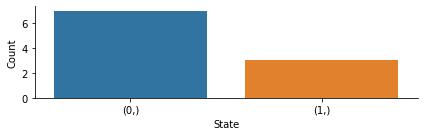

In [14]:
plot_counts(counts)

## Creating more complex circuits

We can make circuits more complicated than the example of the uniform superposition state above. Besides the Hadamard gate, among the most common gates are the rotations (around the X, Y, or Z axis) as well as the "control-NOT" (CNot), the controlled negation, also called `CX`. The list of all the gates available in `pytket` is quite long. It is
available in the documentation [here](https://cqcl.github.io/tket/pytket/api/optype.html).

Let's apply some of these gates to a new circuit with 3 qubits and 3 classical bits.

In [15]:
n_qubits = 3
n_bits = 3
circ2 = Circuit(n_qubits,n_bits)
# a X rotation with angle pi/2 on the qubit 1
circ2.Rx(0.5, 1)
# a Z rotation with angle pi/4 on the qubit 0
circ2.Rz(0.25, 0)
# a CNot gate between qubits 0 and 2
circ2.CX(0, 2)
circ2.measure_all()
render_circuit_jupyter(circ2)


We have seen how to define a circuit and visualize it, as well as how to run it on a simulator. Next, we will discuss how to run a circuit on an emulator or actual quantum computer.